# Expdataanalysis (EDA lib)

## Imports

In [1]:
import expdataanalysis as eda
import pandas as pd

## Считывание файла и работа с памятью

### *eda.read_file(path, type_file="", optimization=False, **kwargs)*

Функция read_file используется для чтения файла в зависимости от его формата. На данный момент поддерживаются форматы csv и json.
* path - путь к файлу
* typefile - можно указать заранее тип файла (например, csv, json), чтобы не ориентироваться на расширение файла
* optimization - позволяет по умолчанию выполнить оптимизацию файла в памяти
* \*\*kwargs - передача специальных аргументов для функции чтения файла (например, *delimeter*, *index_col*)

При успешном определении типа файла либо при заданном типе файла функция возвращает датафрейм.

In [2]:
house_df = eda.read_file('kc_house_data.csv', type_file="csv", optimization=True)
json_df = eda.read_file("Config", "json")
titanic_df = eda.read_file("train_titanic.csv", index_col="PassengerId")
apple_df = eda.read_file('apple.csv', index_col='Date', parse_dates=True)

reading csv file...
reading json file...
reading csv file...
reading csv file...


### *eda.get_mem_usage(df, print_inf = False)*

Функция get_mem_usage предоставляет информацию о размере датафрейма (в МБ)
* df - датафрейм, для которого требуется узнать информацию о размере
* print_inf - параметр, в зависимости от которого происходит или не происходит вывод через Print

Функция возвращает размер датафрейма

In [23]:
eda.get_mem_usage(titanic_df)

0.081695556640625

In [24]:
eda.get_mem_usage(house_df, print_inf=True)

Memory usage of dataframe is 3.46 MB


3.4628982543945312

### *eda.optimize_mem_usage(df, use_float16=False, print_inf = False)*

Функция optimize_mem_usage используется для оптимизации используемой датафреймом памяти
* df - оптимизируемый датафрейм
* use_float16 - позволяет использовать или не использовать float16, по умолчанию не используется
* print_inf - параметр, в зависимости от которого происходит или не происходит вывод через Print

Функция возвращает оптимизированный датафрейм

In [28]:
house_df = eda.optimize_mem_usage(house_df, print_inf=True)

Memory usage of dataframe is 1.23 MB
Memory usage after optimization is: 1.23 MB
Decreased by 0.0%


## Информация о данных

### *eda.missing_data(df)*

Функция missing_data вычисляет и выводит количество пропусков в данных по каждому полю данных датафрейма
* df - исследуемый датафрейм

Функция выводит информацию о пропусках в данных

In [3]:
eda.missing_data(titanic_df)

PassengerId: 0/891 (0%)
Survived: 0/891 (0%)
Pclass: 0/891 (0%)
Name: 0/891 (0%)
Sex: 0/891 (0%)
Age: 177/891 (19%)
SibSp: 0/891 (0%)
Parch: 0/891 (0%)
Ticket: 0/891 (0%)
Fare: 0/891 (0%)
Cabin: 687/891 (77%)
Embarked: 2/891 (0%)


### *eda.count_types(df)*

Функция count_types позволяет узнать, сколько данных и какого типа в датафрейме
* df - исследуемый датафрейм

Функция выводит информацию о количестве данных каждого типа, суммарную информацию, и полное количество данных

In [4]:
eda.count_types(titanic_df)

Every column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
-----
Summary:
object     5
int64      5
float64    2
dtype: int64
-----
All data:
{'int64': 4455, 'object': 4455, 'float64': 1782}


### *eda.get_description(df)*

Функция get_description позволяет получить базовые стохастические характеристики (наибольшее, наименьшее, среднее, мода, медиана, ско)
* df - исследуемый датафрейм

Функция возвращает датафрейм с полученными характеристиками 

In [5]:
eda.get_description(titanic_df)

PassengerId    Survived      Pclass         Age       SibSp  \
count    891.000000  891.000000  891.000000  714.000000  891.000000   
mean     446.000000    0.383838    2.308642   29.699118    0.523008   
std      257.353842    0.486592    0.836071   14.526497    1.102743   
min        1.000000    0.000000    1.000000    0.420000    0.000000   
25%      223.500000    0.000000    2.000000   20.125000    0.000000   
50%      446.000000    0.000000    3.000000   28.000000    0.000000   
75%      668.500000    1.000000    3.000000   38.000000    1.000000   
max      891.000000    1.000000    3.000000   80.000000    8.000000   
mode       1.000000    0.000000    3.000000   24.000000    0.000000   
median   446.000000    0.000000    3.000000   28.000000    0.000000   

             Parch        Fare  
count   891.000000  891.000000  
mean      0.381594   32.204208  
std       0.806057   49.693429  
min       0.000000    0.000000  
25%       0.000000    7.910400  
50%       0.000000   14.454200  
75%       0.000000   31.000000  
max       6.000000  512.329200  
mode      0.000000    8.050000  
median    0.000000   14.454200

### eda.get_group_description(df, gb_column)

Функция get_groip_description позволяет получить базовые стохастические характеристики (наибольшее, наименьшее, среднее, мода, медиана, ско) после группировки данных по определенному полю
* df - исследуемый датафрейм
* gb_column - поле для группировки

Функция выводит базовые характеристики каждого поля после группировки

In [3]:
eda.get_group_description(titanic_df, 'Survived')

PassengerId                                                     \
               count        mean         std  min     25%    50%    75%   
Survived                                                                  
0              549.0  447.016393  260.640469  1.0  211.00  455.0  675.0   
1              342.0  444.368421  252.358840  2.0  250.75  439.5  651.5   

                             
            max mode median  
Survived                     
0         891.0    1  455.0  
1         890.0    2  439.5

Pclass                                                         
          count      mean       std  min  25%  50%  75%  max mode median
Survived                                                                
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0    3      3
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0    1      2

Name                                         
         count unique                          top freq
Survived                                               
0          549    549          Svensson, Mr. Johan    1
1          342    342  Nakid, Miss. Maria ("Mary")    1

Sex                    
         count unique     top freq
Survived                          
0          549      2    male  468
1          342      2  female  233

Age                                                            \
          count       mean        std   min   25%   50%   75%   max  mode   
Survived                                                                    
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  21.0   
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  24.0   

                 
         median  
Survived         
0          28.0  
1          28.0

SibSp                                                         
          count      mean       std  min  25%  50%  75%  max mode median
Survived                                                                
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0    0      0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0    0      0

Parch                                                         
          count      mean       std  min  25%  50%  75%  max mode median
Survived                                                                
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0    0      0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0    0      0

Ticket                      
          count unique       top freq
Survived                             
0           549    470  CA. 2343    7
1           342    260      1601    5

Fare                                                            \
          count       mean        std  min      25%   50%   75%       max   
Survived                                                                    
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000   
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292   

                        
           mode median  
Survived                
0          8.05   10.5  
1         13.00   26.0

Cabin                     
         count unique      top freq
Survived                           
0           68     62      D26    2
1          136    101  B96 B98    4

Embarked                
            count unique top freq
Survived                         
0             549      3   S  427
1             340      3   S  217

### *eda.get_corr_matrix(df, corr_method='pearson')*

Функция get_corr_matrix вычисляет корреляцию между полями данных
* df - исследуемый датафрейм
* corr_method - метод корреляции, по умолчанию значение 'pearson'

Функция возвращает матрицу корреляции для вывода или дальнейшей обработки

In [5]:
eda.get_corr_matrix(titanic_df)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

## Графики

### *eda.plot_corr_matrix(df, figsize=(10,5), corr_method='pearson')*

Функция plot_corr_matrix строит тепловую карту корреляционной матрицы
* df - исследуемый датафрейм
* figsize - размер выводимого графика, по умолчанию (10,5)
* corr_method - метод корреляции, по умолчанию значение 'pearson'

Функция выводит тепловую карту

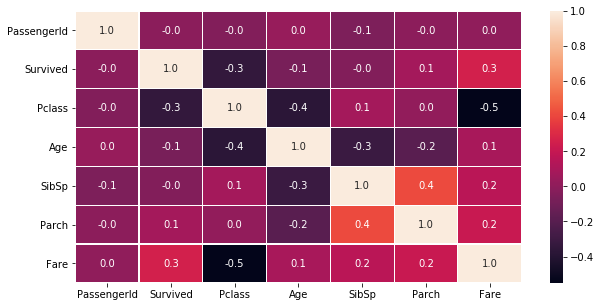

In [6]:
eda.plot_corr_matrix(titanic_df)

### *eda.plot_scatter(df, y, figsize=(10,10), chart_in_str=3)*

Функция plot_scatter строит графики зависимости одного поля (y) от других полей датафрейма (диаграммы рассеяния)
* df - датафрейм, содержащий x-столбцы
* y - текст - название столбца
* figsize - размер выводимого графика, по умолчанию (10,10)
* chart_in_str - количество графиков в каждой строке, по умолчанию 3

Функция выводит полученные графики

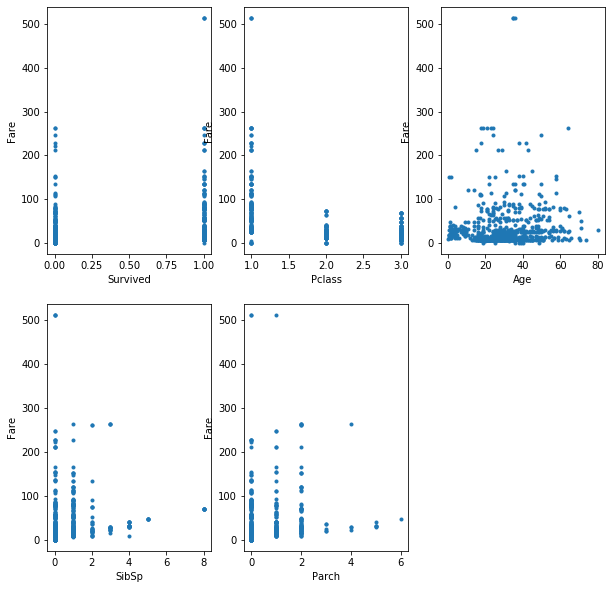

In [3]:
eda.plot_scatter(titanic_df,'Fare')

### *eda.plot_scatter_matrix(df, **kwargs)*

Функция plot_scatter_matrix строит матрицу графиков взаимной зависимости всех числовых полей датафрейма ко всем полям
* df - исследуемый датафрейм

Функция выводит полученные графики

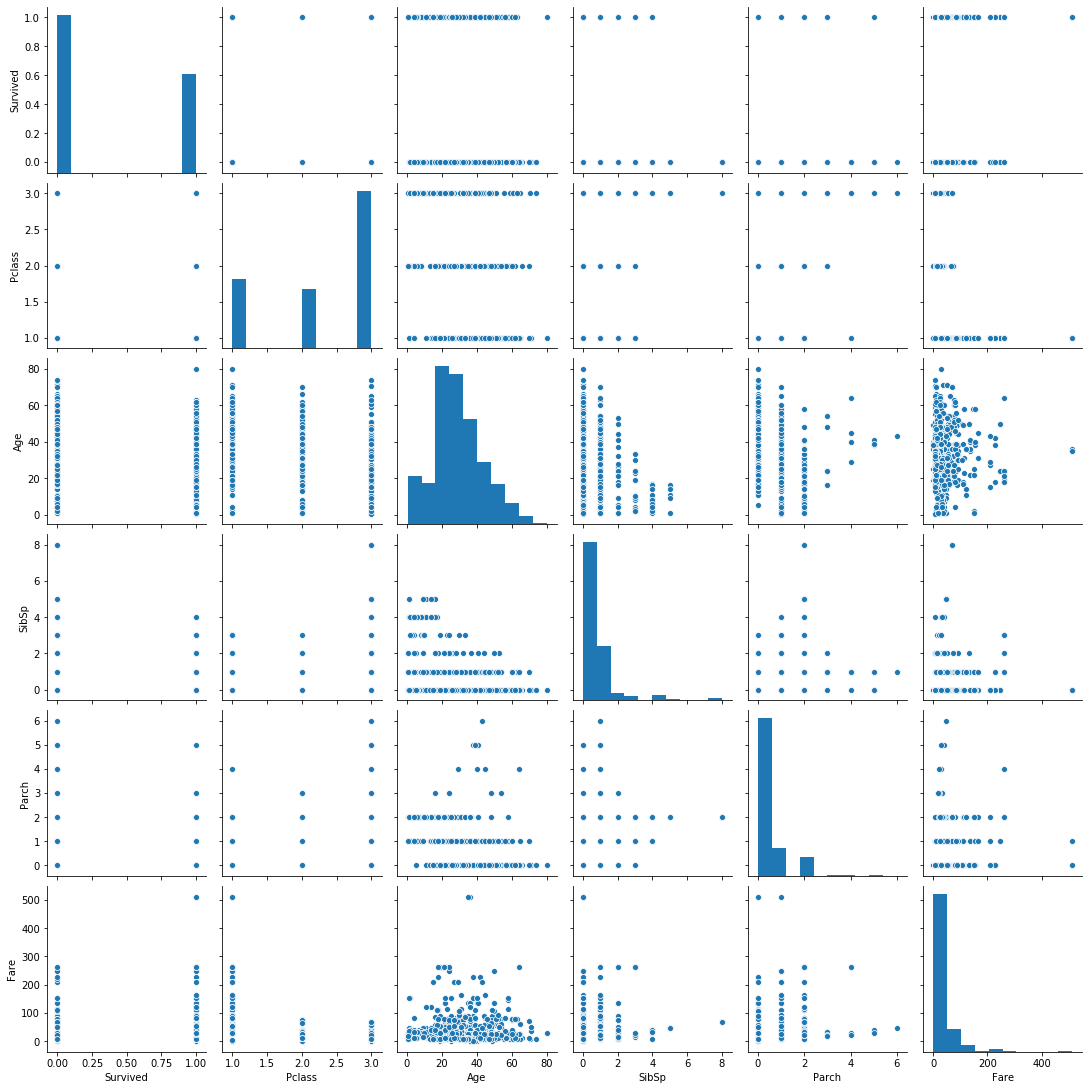

In [8]:
eda.plot_scatter_matrix(titanic_df)

### *eda.plot_boxplots(df, y, unique_filter=10, turn=False, **kwargs)*

Функция plot_boxplots строит график выбросов для каждого числового столбца датафрейма
* df - исследуемый датафрейм
* y - название поля, для которого строится боксплот
* unique_filter - позволяет убрать нагромажденные графики (по умолчанию = 10; если значение отрицательное, то фильтр не используется)
* turn - меняет ось x и y местами
* \*\*kwargs - передача специальных аргументов при необходимости

Функция выводит построенные графики

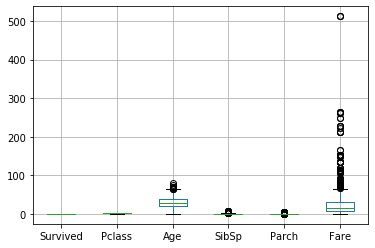

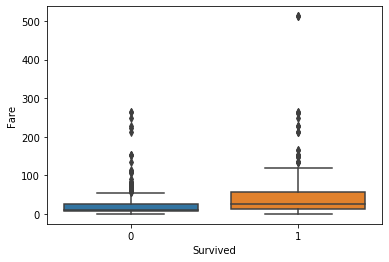

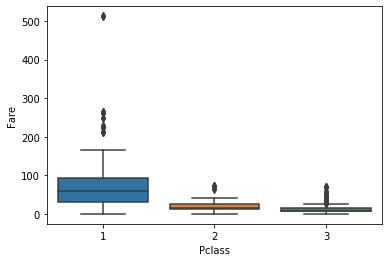

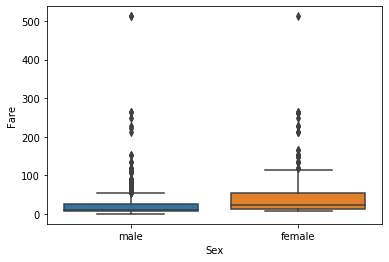

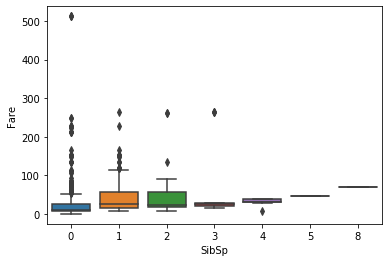

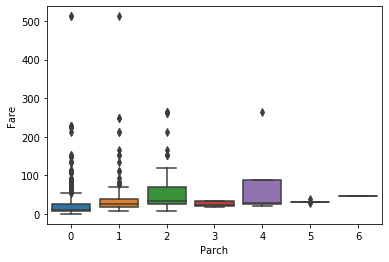

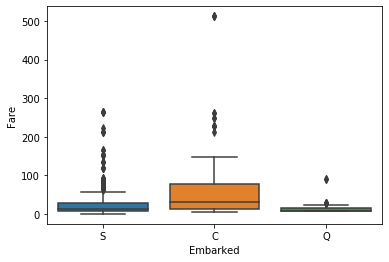

In [17]:
eda.plot_boxplots(titanic_df, 'Fare')

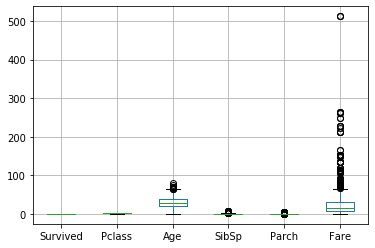

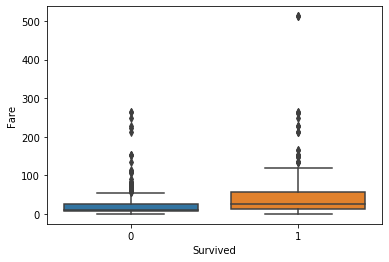

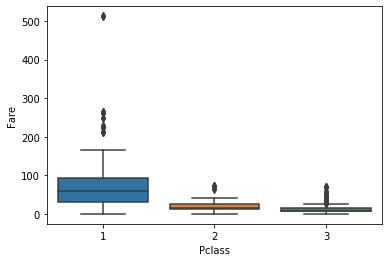

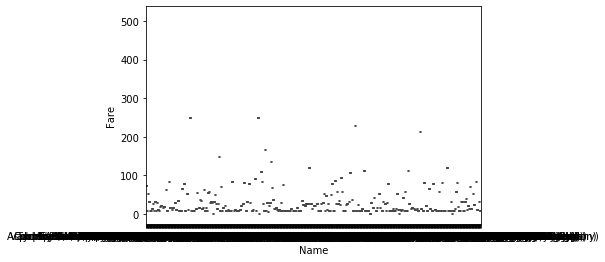

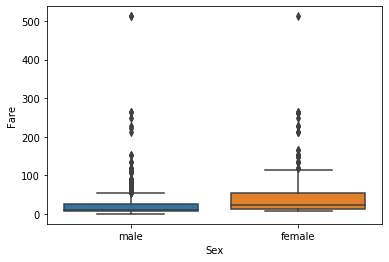

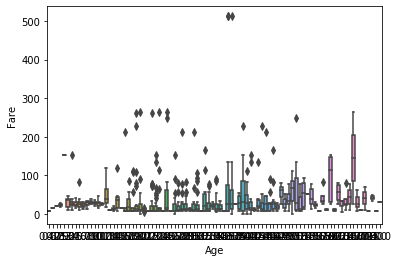

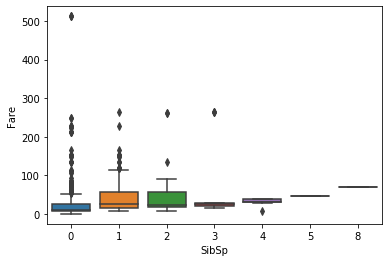

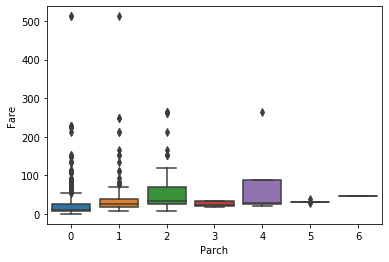

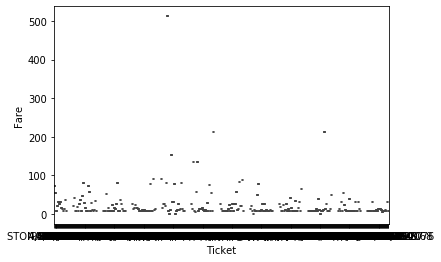

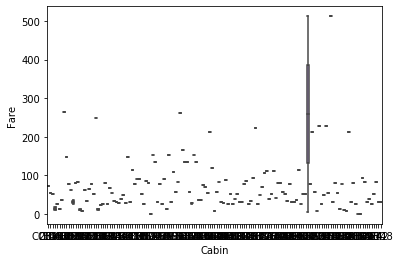

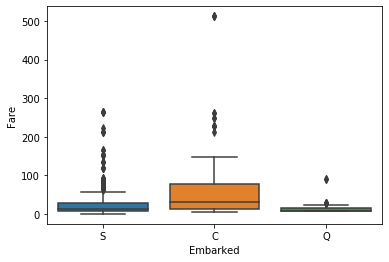

In [18]:
eda.plot_boxplots(titanic_df, 'Fare', unique_filter=0)

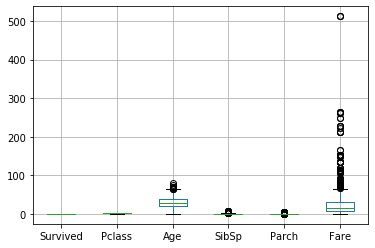

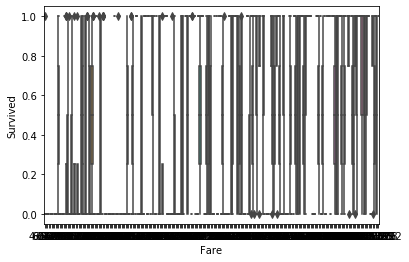

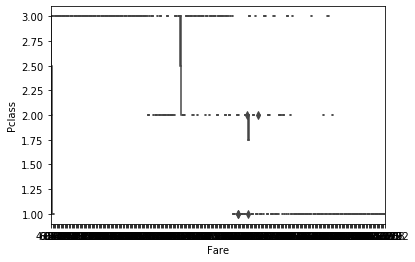

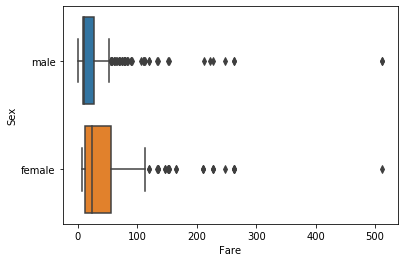

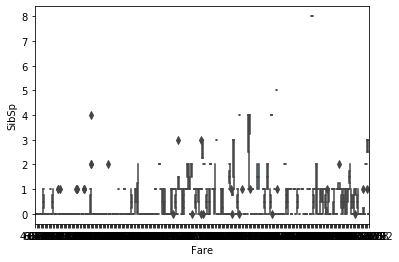

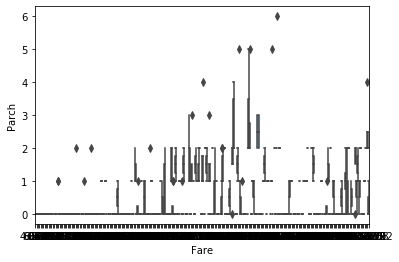

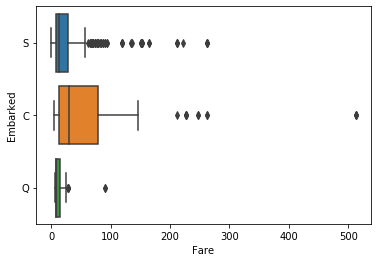

In [19]:
eda.plot_boxplots(titanic_df, 'Fare', turn=True)

## Кратко что-то еще

In [3]:
df = eda.read_file('Mobile_phone.csv')

reading csv file...


Описание набора данных с [kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv)
* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth or not
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support or not
* fc - Front Camera mega pixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Mega Bytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last when you are
* three_g - Has 3G or not
* touch_screen - Has touch screen or not
* wifi - Has wifi or not
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
pd.options.display.max_columns = 25
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [5]:
eda.get_mem_usage(df)

0.320556640625

In [6]:
eda.count_types(df)

Every column:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
-----
Summary:
int64      19
float64     2
dtype: int64
-----
All data:
{'int64': 38000, 'float64': 4000}


In [7]:
df = eda.optimize_mem_usage(df, print_inf=True)

Memory usage of dataframe is 0.32 MB
Memory usage after optimization is: 0.06 MB
Decreased by 80.9%


In [8]:
eda.count_types(df)

Every column:
battery_power      int16
blue                int8
clock_speed      float32
dual_sim            int8
fc                  int8
four_g              int8
int_memory          int8
m_dep            float32
mobile_wt          int16
n_cores             int8
pc                  int8
px_height          int16
px_width           int16
ram                int16
sc_h                int8
sc_w                int8
talk_time           int8
three_g             int8
touch_screen        int8
wifi                int8
price_range         int8
dtype: object
-----
Summary:
int8       14
int16       5
float32     2
dtype: int64
-----
All data:
{'int16': 10000, 'int8': 28000, 'float32': 4000}


In [9]:
eda.missing_data(df)

battery_power: 0/2000 (0%)
blue: 0/2000 (0%)
clock_speed: 0/2000 (0%)
dual_sim: 0/2000 (0%)
fc: 0/2000 (0%)
four_g: 0/2000 (0%)
int_memory: 0/2000 (0%)
m_dep: 0/2000 (0%)
mobile_wt: 0/2000 (0%)
n_cores: 0/2000 (0%)
pc: 0/2000 (0%)
px_height: 0/2000 (0%)
px_width: 0/2000 (0%)
ram: 0/2000 (0%)
sc_h: 0/2000 (0%)
sc_w: 0/2000 (0%)
talk_time: 0/2000 (0%)
three_g: 0/2000 (0%)
touch_screen: 0/2000 (0%)
wifi: 0/2000 (0%)
price_range: 0/2000 (0%)


In [10]:
eda.get_description(df)

battery_power       blue  clock_speed     dual_sim           fc  \
count     2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean      1238.518500     0.4950     1.522250     0.509500     4.309500   
std        439.418206     0.5001     0.816006     0.500035     4.341444   
min        501.000000     0.0000     0.500000     0.000000     0.000000   
25%        851.750000     0.0000     0.700000     0.000000     1.000000   
50%       1226.000000     0.0000     1.500000     1.000000     3.000000   
75%       1615.250000     1.0000     2.200000     1.000000     7.000000   
max       1998.000000     1.0000     3.000000     1.000000    19.000000   
mode       618.000000     0.0000     0.500000     1.000000     0.000000   
median    1226.000000     0.0000     1.500000     1.000000     3.000000   

             four_g   int_memory        m_dep    mobile_wt      n_cores  \
count   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean       0.521500    32.046500     0.501749   140.249000     4.520500   
std        0.499662    18.145715     0.288415    35.399655     2.287837   
min        0.000000     2.000000     0.100000    80.000000     1.000000   
25%        0.000000    16.000000     0.200000   109.000000     3.000000   
50%        1.000000    32.000000     0.500000   141.000000     4.000000   
75%        1.000000    48.000000     0.800000   170.000000     7.000000   
max        1.000000    64.000000     1.000000   200.000000     8.000000   
mode       1.000000    27.000000     0.100000   182.000000     4.000000   
median     1.000000    32.000000     0.500000   141.000000     4.000000   

                 pc    px_height     px_width          ram         sc_h  \
count   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean       9.916500   645.108000  1251.515500  2124.213000    12.306500   
std        6.064315   443.780811   432.199447  1084.732044     4.213245   
min        0.000000     0.000000   500.000000   256.000000     5.000000   
25%        5.000000   282.750000   874.750000  1207.500000     9.000000   
50%       10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%       15.000000   947.250000  1633.000000  3064.500000    16.000000   
max       20.000000  1960.000000  1998.000000  3998.000000    19.000000   
mode      10.000000   347.000000   874.000000  1229.000000    17.000000   
median    10.000000   564.000000  1247.000000  2146.500000    12.000000   

               sc_w    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   
mode       1.000000     7.000000     1.000000      1.000000     1.000000   
median     5.000000    11.000000     1.000000      1.000000     1.000000   

        price_range  
count   2000.000000  
mean       1.500000  
std        1.118314  
min        0.000000  
25%        0.750000  
50%        1.500000  
75%        2.250000  
max        3.000000  
mode       0.000000  
median     1.500000

In [11]:
eda.get_group_description(df,'price_range')

battery_power                                                \
                    count      mean         std    min      25%     50%   
price_range                                                               
0                   500.0  1116.902  410.801305  503.0   770.50  1066.0   
1                   500.0  1228.868  438.614528  501.0   843.00  1206.0   
2                   500.0  1228.320  452.863065  501.0   816.50  1219.5   
3                   500.0  1379.984  414.992261  503.0  1034.75  1449.5   

                                            
                 75%     max  mode  median  
price_range                                 
0            1431.25  1994.0   504  1066.0  
1            1596.25  1996.0   569  1206.0  
2            1635.75  1998.0   600  1219.5  
3            1733.50  1994.0  1589  1449.5

blue                                                      
             count   mean       std  min  25%  50%  75%  max mode median
price_range                                                             
0            500.0  0.486  0.500305  0.0  0.0  0.0  1.0  1.0    0      0
1            500.0  0.490  0.500401  0.0  0.0  0.0  1.0  1.0    0      0
2            500.0  0.486  0.500305  0.0  0.0  0.0  1.0  1.0    0      0
3            500.0  0.518  0.500176  0.0  0.0  1.0  1.0  1.0    1      1

clock_speed                                                     \
                  count      mean       std  min  25%   50%  75%  max mode   
price_range                                                                  
0                 500.0  1.550201  0.848942  0.5  0.6  1.55  2.3  3.0  0.5   
1                 500.0  1.488600  0.814479  0.5  0.6  1.50  2.2  3.0  0.5   
2                 500.0  1.529800  0.804403  0.5  0.7  1.50  2.2  3.0  0.5   
3                 500.0  1.520399  0.796450  0.5  0.7  1.50  2.2  3.0  0.5   

                    
            median  
price_range         
0             1.55  
1             1.50  
2             1.50  
3             1.50

dual_sim                                                      
               count   mean       std  min  25%  50%  75%  max mode median
price_range                                                               
0              500.0  0.500  0.500501  0.0  0.0  0.5  1.0  1.0    0    0.5
1              500.0  0.510  0.500401  0.0  0.0  1.0  1.0  1.0    1    1.0
2              500.0  0.498  0.500497  0.0  0.0  0.0  1.0  1.0    0    0.0
3              500.0  0.530  0.499599  0.0  0.0  1.0  1.0  1.0    1    1.0

fc                                                       
             count   mean       std  min  25%  50%  75%   max mode median
price_range                                                              
0            500.0  4.084  4.183772  0.0  1.0  3.0  6.0  19.0    0      3
1            500.0  4.340  4.499432  0.0  1.0  3.0  7.0  18.0    0      3
2            500.0  4.498  4.347390  0.0  1.0  3.0  7.0  18.0    0      3
3            500.0  4.316  4.332399  0.0  1.0  3.0  7.0  18.0    0      3

four_g                                                      
             count   mean       std  min  25%  50%  75%  max mode median
price_range                                                             
0            500.0  0.518  0.500176  0.0  0.0  1.0  1.0  1.0    1      1
1            500.0  0.524  0.499924  0.0  0.0  1.0  1.0  1.0    1      1
2            500.0  0.494  0.500465  0.0  0.0  0.0  1.0  1.0    0      0
3            500.0  0.550  0.497992  0.0  0.0  1.0  1.0  1.0    1      1

int_memory                                                       \
                 count    mean        std  min   25%   50%   75%   max mode   
price_range                                                                   
0                500.0  31.174  18.101023  2.0  15.0  30.0  47.0  64.0   14   
1                500.0  32.116  18.000739  2.0  16.0  32.0  47.0  64.0    7   
2                500.0  30.920  18.441958  2.0  15.0  30.0  48.0  64.0    2   
3                500.0  33.976  17.930377  2.0  18.0  34.5  49.0  64.0   44   

                    
            median  
price_range         
0             30.0  
1             32.0  
2             30.0  
3             34.5

m_dep                                                       
             count    mean       std  min  25%  50%  75%  max mode median
price_range                                                              
0            500.0  0.4902  0.288184  0.1  0.2  0.5  0.7  1.0  0.1    0.5
1            500.0  0.5240  0.286895  0.1  0.3  0.5  0.8  1.0  0.1    0.5
2            500.0  0.4908  0.286215  0.1  0.2  0.5  0.7  1.0  0.1    0.5
3            500.0  0.5020  0.291902  0.1  0.2  0.5  0.8  1.0  0.1    0.5

mobile_wt                                                         \
                count     mean        std   min     25%    50%    75%    max   
price_range                                                                    
0               500.0  140.552  36.378319  80.0  108.75  142.0  173.0  200.0   
1               500.0  140.510  35.678956  80.0  109.00  141.0  170.0  200.0   
2               500.0  143.614  34.320326  80.0  114.00  145.0  172.0  200.0   
3               500.0  136.320  34.911994  80.0  104.00  134.0  165.0  200.0   

                         
            mode median  
price_range              
0            124    142  
1            199    141  
2            145    145  
3             88    134

n_cores                                                      
              count   mean       std  min  25%  50%  75%  max mode median
price_range                                                              
0             500.0  4.600  2.268544  1.0  3.0  5.0  7.0  8.0    2      5
1             500.0  4.298  2.311684  1.0  2.0  4.0  6.0  8.0    1      4
2             500.0  4.682  2.262546  1.0  3.0  5.0  7.0  8.0    4      5
3             500.0  4.502  2.297074  1.0  2.0  5.0  7.0  8.0    5      5

pc                                                          
             count    mean       std  min  25%   50%   75%   max mode median
price_range                                                                 
0            500.0   9.574  6.095805  0.0  4.0   9.5  15.0  20.0    0    9.5
1            500.0   9.924  6.124806  0.0  4.0  10.0  15.0  20.0   10   10.0
2            500.0  10.018  5.952861  0.0  5.0  10.0  15.0  20.0    7   10.0
3            500.0  10.150  6.085521  0.0  5.0  10.0  16.0  20.0    6   10.0

px_height                                                     \
                count     mean         std   min     25%    50%      75%   
price_range                                                                
0               500.0  536.408  372.824164   1.0  229.00  465.5   776.50   
1               500.0  666.892  441.351209   0.0  327.25  606.0   944.25   
2               500.0  632.284  445.789232  10.0  252.50  538.5   942.75   
3               500.0  744.848  483.720179   0.0  341.75  674.0  1109.50   

                                 
                max mode median  
price_range                      
0            1878.0   79  465.5  
1            1914.0   56  606.0  
2            1960.0  127  538.5  
3            1949.0  347  674.0

px_width                                                         \
               count      mean         std    min      25%     50%      75%   
price_range                                                                   
0              500.0  1150.270  413.001780  500.0   805.75  1132.5  1452.75   
1              500.0  1251.908  433.564352  500.0   878.75  1223.0  1629.00   
2              500.0  1234.046  427.757151  508.0   862.50  1221.5  1613.25   
3              500.0  1369.838  426.823571  501.0  1041.50  1415.5  1746.25   

                                   
                max  mode  median  
price_range                        
0            1989.0  1247  1132.5  
1            1998.0   874  1223.0  
2            1997.0   736  1221.5  
3            1995.0  1418  1415.5

ram                                                          \
             count      mean         std     min      25%     50%      75%   
price_range                                                                  
0            500.0   785.314  362.755397   256.0   488.75   719.5  1037.00   
1            500.0  1679.490  465.850159   387.0  1354.00  1686.5  2033.75   
2            500.0  2582.816  496.211735  1185.0  2292.75  2577.0  2927.00   
3            500.0  3449.232  393.019923  2259.0  3207.50  3509.5  3764.75   

                                   
                max  mode  median  
price_range                        
0            1974.0   315   719.5  
1            2811.0  1464  1686.5  
2            3916.0  2334  2577.0  
3            3998.0  3142  3509.5

sc_h                                                          
             count    mean       std  min  25%   50%   75%   max mode median
price_range                                                                 
0            500.0  12.324  4.206949  5.0  9.0  12.0  16.0  19.0   14     12
1            500.0  12.212  4.226913  5.0  8.0  12.0  16.0  19.0   17     12
2            500.0  12.010  4.234355  5.0  8.0  12.0  16.0  19.0    7     12
3            500.0  12.680  4.168976  5.0  9.0  13.0  16.0  19.0   17     13

sc_w                                                         
             count   mean       std  min  25%  50%    75%   max mode median
price_range                                                                
0            500.0  5.682  4.174173  0.0  2.0  5.0   8.25  18.0    3      5
1            500.0  5.544  4.238868  0.0  2.0  5.0   8.00  18.0    4      5
2            500.0  5.714  4.265747  0.0  2.0  5.0   8.00  17.0    1      5
3            500.0  6.128  4.716790  0.0  2.0  5.0  10.00  18.0    1      5

talk_time                                                     \
                count    mean       std  min  25%   50%   75%   max mode   
price_range                                                                
0               500.0  10.612  5.397009  2.0  6.0  10.0  15.0  20.0    4   
1               500.0  11.362  5.570729  2.0  7.0  12.0  16.0  20.0    7   
2               500.0  10.972  5.433070  2.0  6.0  11.0  16.0  20.0   15   
3               500.0  11.098  5.443129  2.0  7.0  11.0  16.0  20.0    7   

                    
            median  
price_range         
0               10  
1               12  
2               11  
3               11

three_g                                                      
              count   mean       std  min  25%  50%  75%  max mode median
price_range                                                              
0             500.0  0.746  0.435734  0.0  0.0  1.0  1.0  1.0    1      1
1             500.0  0.756  0.429923  0.0  1.0  1.0  1.0  1.0    1      1
2             500.0  0.774  0.418658  0.0  1.0  1.0  1.0  1.0    1      1
3             500.0  0.770  0.421254  0.0  1.0  1.0  1.0  1.0    1      1

touch_screen                                                      
                   count   mean       std  min  25%  50%  75%  max mode median
price_range                                                                   
0                  500.0  0.524  0.499924  0.0  0.0  1.0  1.0  1.0    1      1
1                  500.0  0.522  0.500016  0.0  0.0  1.0  1.0  1.0    1      1
2                  500.0  0.470  0.499599  0.0  0.0  0.0  1.0  1.0    0      0
3                  500.0  0.496  0.500485  0.0  0.0  0.0  1.0  1.0    0      0

wifi                                                      
             count   mean       std  min  25%  50%  75%  max mode median
price_range                                                             
0            500.0  0.496  0.500485  0.0  0.0  0.0  1.0  1.0    0      0
1            500.0  0.504  0.500485  0.0  0.0  1.0  1.0  1.0    1      1
2            500.0  0.504  0.500485  0.0  0.0  1.0  1.0  1.0    1      1
3            500.0  0.524  0.499924  0.0  0.0  1.0  1.0  1.0    1      1

In [12]:
eda.get_corr_matrix(df)

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores        pc  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  0.031441   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161 -0.009952   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724 -0.005245   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658 -0.017143   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  0.644595   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706 -0.005598   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310 -0.033273   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  0.026282   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  0.018844   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000 -0.001193   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  1.000000   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872 -0.018465   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  0.004196   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  0.028984   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  0.004938   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826 -0.023819   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  0.014657   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733 -0.001322   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774 -0.008742   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  0.005389   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  0.033599   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.03

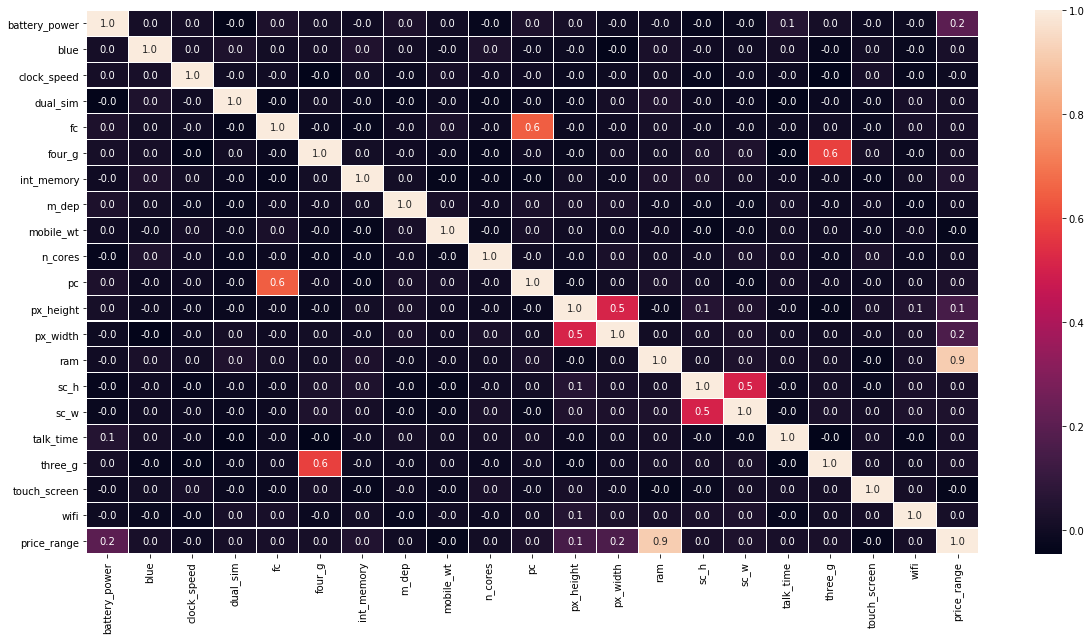

In [13]:
eda.plot_corr_matrix(df, figsize=(20,10))

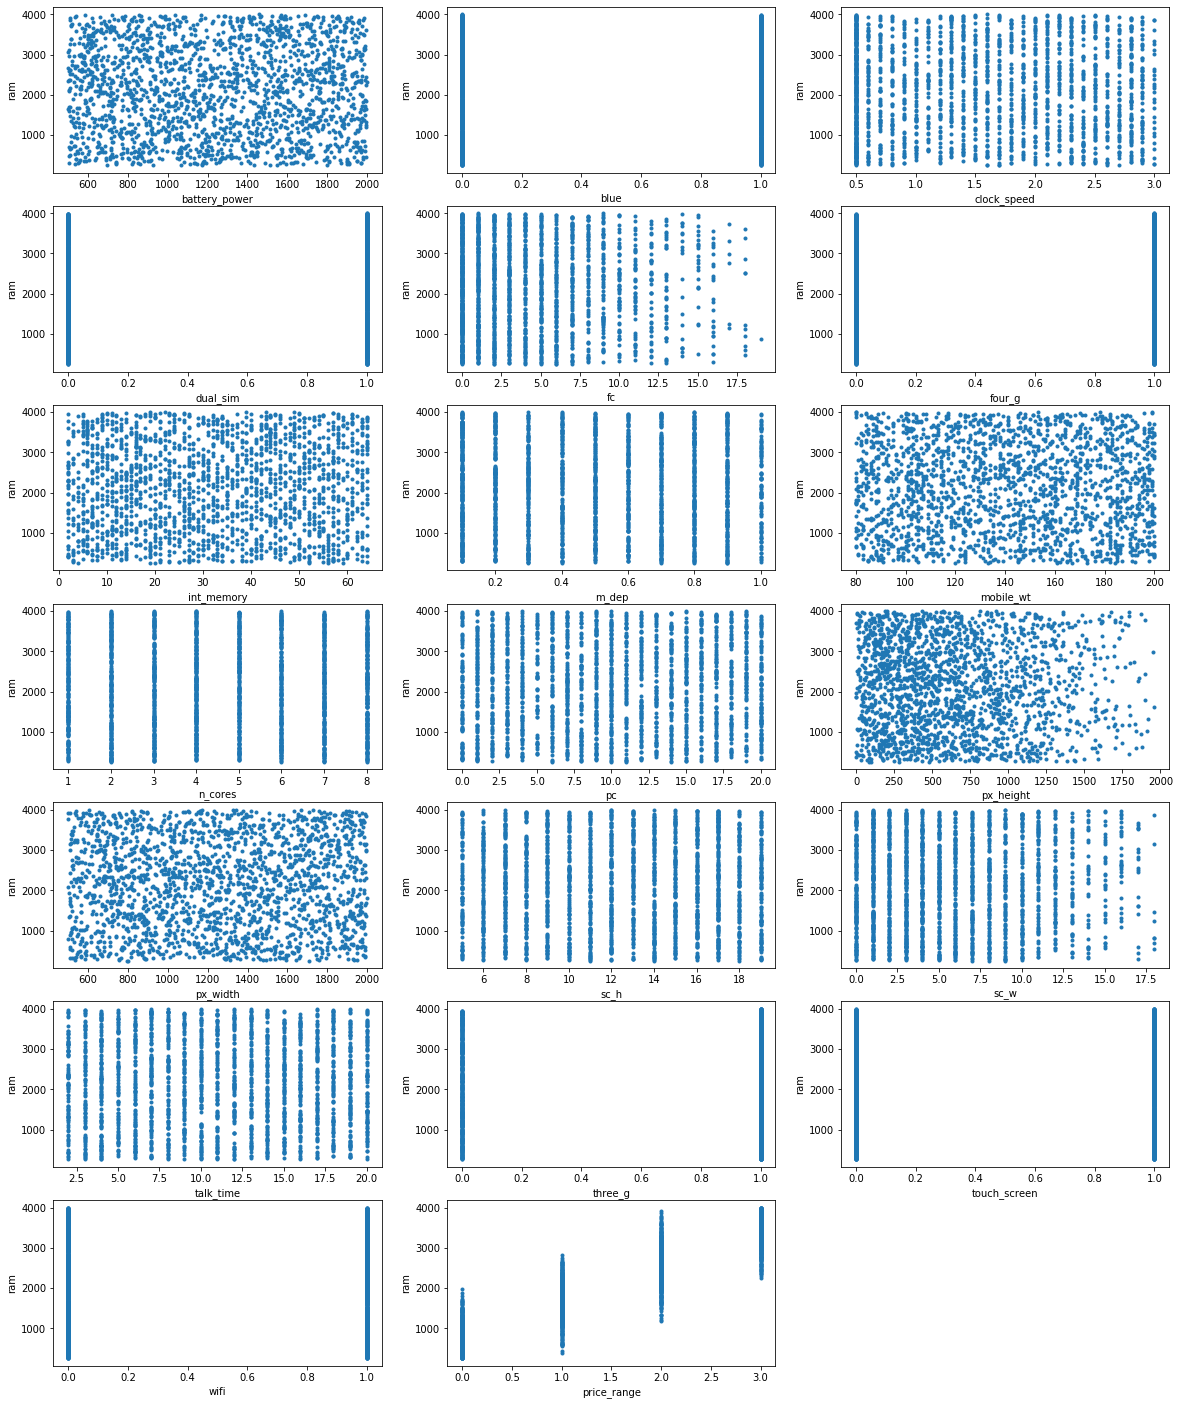

In [14]:
eda.plot_scatter(df, 'ram', figsize=(20,25))

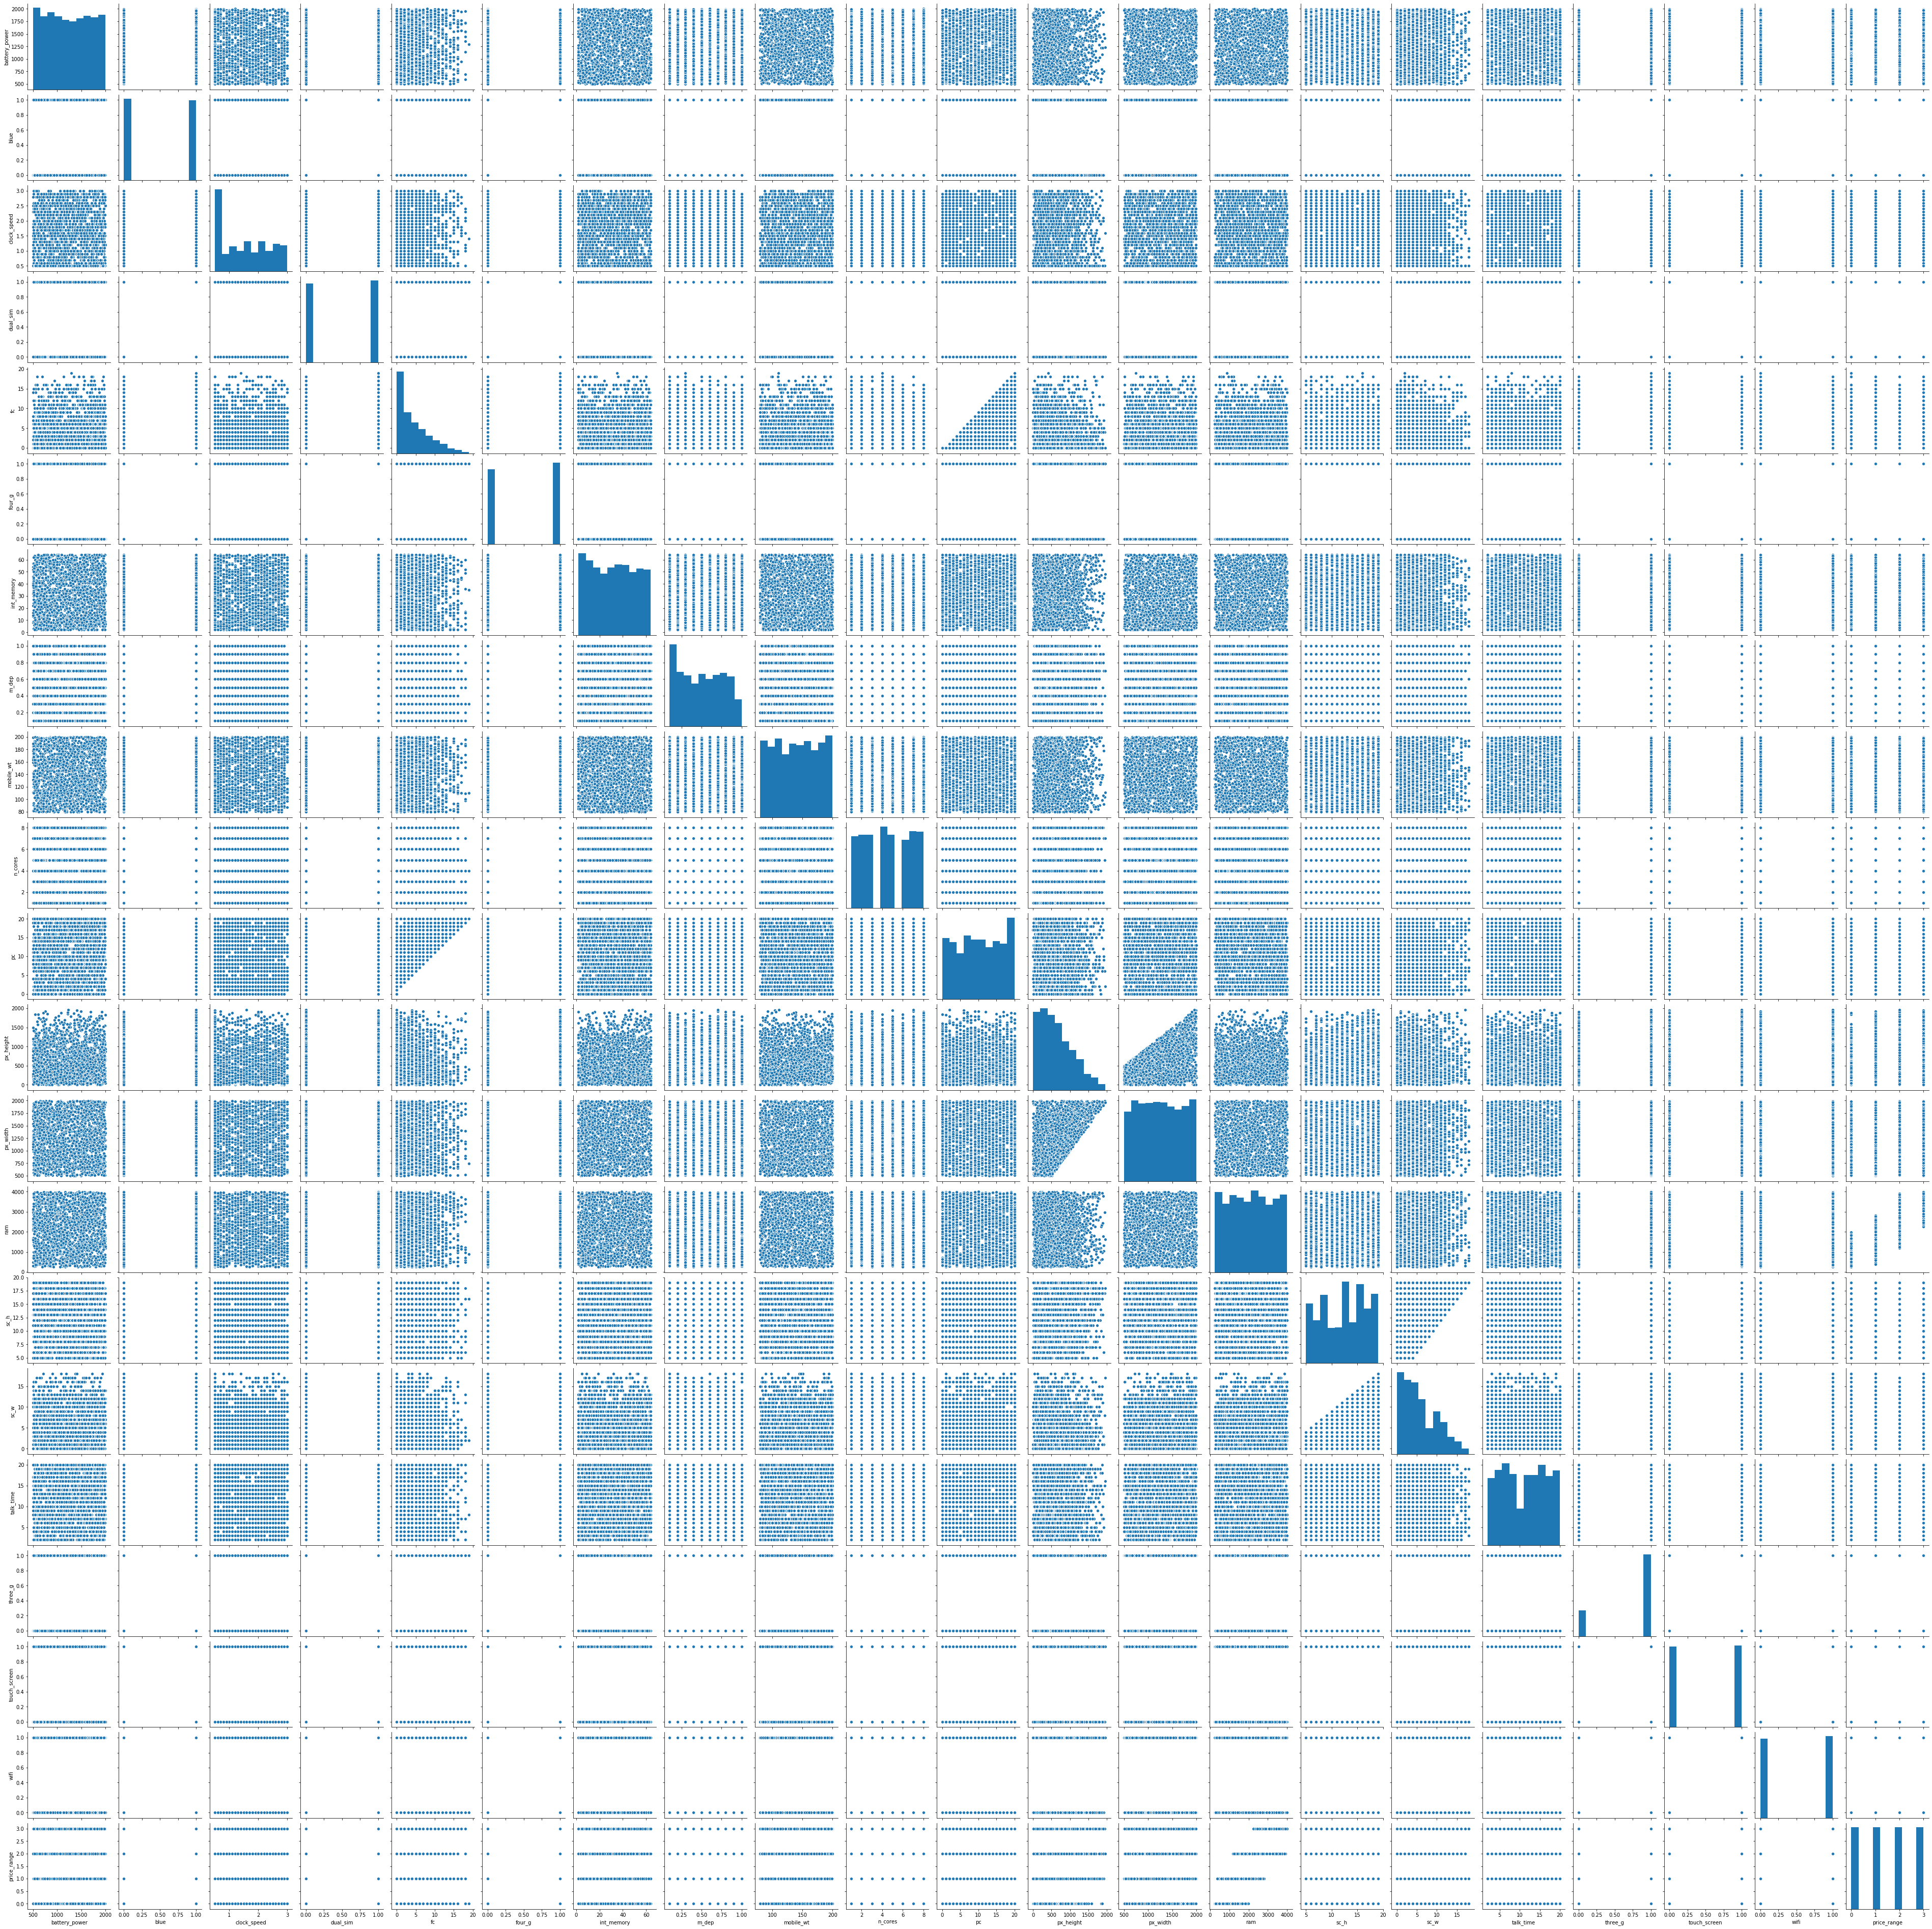

In [15]:
eda.plot_scatter_matrix(df)

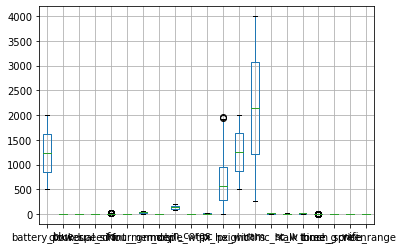

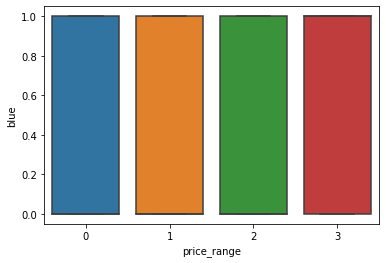

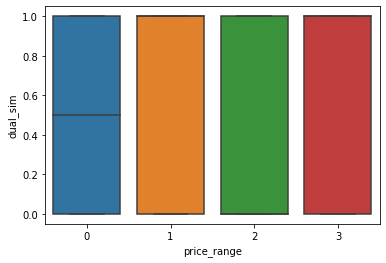

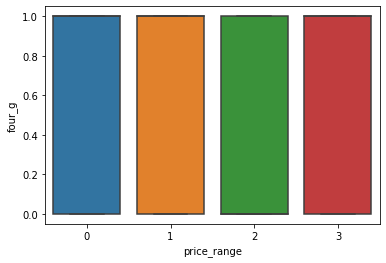

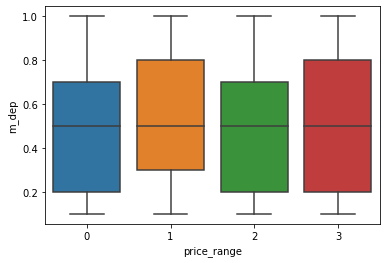

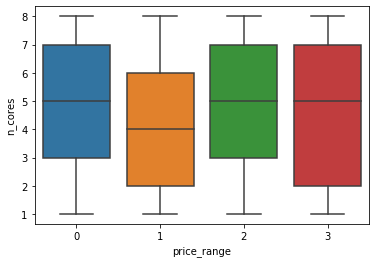

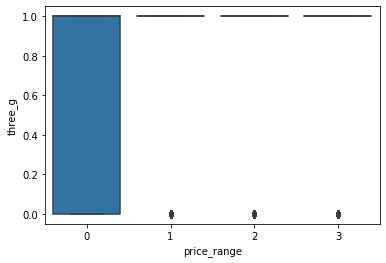

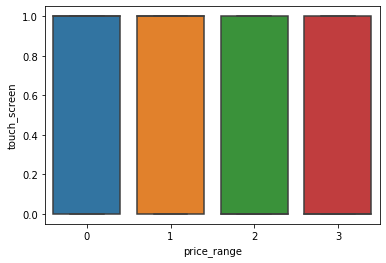

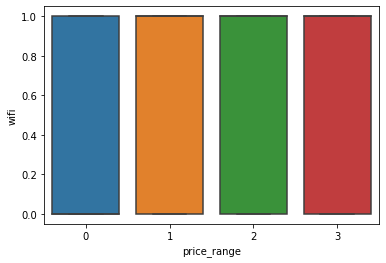

In [16]:
eda.plot_boxplots(df, 'price_range', turn=True)